In [ ]:
import torch
from torch.distributions import Normal

import matplotlib.pyplot as plt

MEAN = 0
STD = 1.5

gassian_kernel = Normal(MEAN, STD)
exp_gaussian = torch.exp(gassian_kernel.sample(torch.Size([100000])))
print(exp_gaussian.max(), exp_gaussian.min())
fig, ax = plt.subplots()
ax.hist(exp_gaussian, bins=100)


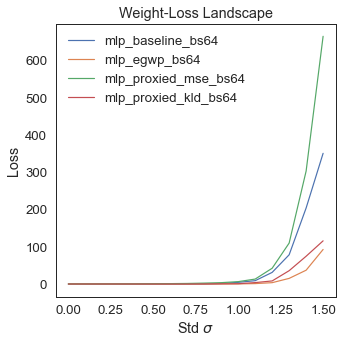

In [2]:
import os
import json
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('seaborn-white')
sns.set_theme(context='paper', style='white', font_scale=1.5)

fig, ax = plt.subplots(figsize=(5, 5))
landscapes = [
    'mlp_baseline_bs64',
    # 'mlp_egwp0.5_bs64',
    'mlp_egwp_bs64',
    # 'mlp_df_bs64',
    'mlp_proxied_mse_bs64',
    'mlp_proxied_kld_bs64'
]
NOISE_STD = np.arange(0, 1.6, 0.1)

for model in landscapes:
    json_path = os.path.join('weight_losses', f'{model}.json')
    with open(json_path, 'r') as f:
        data = json.load(f)
    losses = np.array(data['losses'])
    ax.plot(NOISE_STD, losses, label=model)

ax.set_title('Weight-Loss Landscape')
ax.set_xlabel('Std $\sigma$')
ax.set_ylabel('Loss')
ax.legend()
fig.tight_layout()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(2 * 2 * 16, 10)
        # self.fc2 = nn.Linear(128, 10)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(4, 4)

    def forward(self, x: torch.Tensor):
        x = torch.relu(self.conv1(x))  # 28 -> 24
        x = self.pool1(x)  # 24 -> 12
        x = torch.relu(self.conv2(x))  # 12 -> 8
        x = self.pool2(x)  # 8 -> 2
        x = x.view(-1, 2 * 2 * 16)
        # x = torch.relu(self.fc1(x))
        x = self.fc1(x)
        # x = self.fc2(x)
        return x

net = CNN()

tot = sum(el.numel() for el in net.parameters())
for name, pamameter in net.named_parameters():
    print(f"{name:<20} {pamameter.numel():<12} {pamameter.numel() / tot:5.2f}")

conv1.weight         200           0.05
conv1.bias           8             0.00
conv2.weight         3200          0.79
conv2.bias           16            0.00
fc1.weight           640           0.16
fc1.bias             10            0.00
